In [1]:
#Word cloud generation derived from notebook of Omdena ACET Challenge(https://omdena.com/blog/infrastructural-needs/)
import re
import pandas as pd

In [ ]:
'''Another issue to consider when working with social media data is how to deal with emojis, 
mentions (@MisterX), hashtags (#Africa), email addresses, and URLs. 
The solution depends on your specific task. 
In our project, we used Python re module to remove emojis, email addresses, URLs, and hash symbol 
so that for instance, “#Africa” becomes “Africa”.'''

'Another issue to consider when working with social media data is how to deal with emojis, \nmentions (@MisterX), hashtags (#Africa), email addresses, and URLs. \nThe solution depends on your specific task. \nIn our project, we used Python re module to remove emojis, email addresses, URLs, and hash symbol \nso that for instance, “#Africa” becomes “Africa”.'

In [2]:
emoji_pattern = re.compile("["
   u"\U0001F600-\U0001F64F" # emoticons
   u"\U0001F300-\U0001F5FF" # symbols & pictographs
   u"\U0001F680-\U0001F6FF" # transport & map symbols
   u"\U0001F1E0-\U0001F1FF" # flags (iOS)
   u"\U00002702-\U000027B0"
   u"\U000024C2-\U0001F251"
   u"\U00002500-\U00002BEF" # chinese char
   u"\U0001f921-\U0001f937"
   u"\U00010000-\U0010ffff"
   u"\u2640-\u2642"
   u"\u2600-\u2B55"
   u"\u200d"
   u"\u23cf"
   u"\u23e9"
   u"\u231a"
   u"\ufe0f" # dingbats
   u"\u3030"
   "]+", flags=re.UNICODE)
email_pattern = re.compile("\S+@\S+\.\S{2,3}")
link_pattern = re.compile("https?\S+")

mentions_pattern = re.compile("@[a-zA-Z0-9_.]+?(?![a-zA-Z0-9_.])")
#mentions_pattern = re.compile("(?<![^\s])(([@]{1}|[#]{1})[A-Za-z0-9]+)(?![^\s])")


In [4]:
from google.colab import files
uploaded = files.upload()

Saving stopwords-it_final.txt to stopwords-it_final.txt


In [5]:
df= pd.read_csv('/content/twint_scraped_2022_5cols.csv')
#df.drop(df.columns.difference(['id','created_at', 'username', 'tweet', 'hashtags']), 1, inplace=True)

In [6]:
def clean_data(tweet):
    try:
        tweet_rep = emoji_pattern.sub(r'', tweet)
        tweet_rep = email_pattern.sub(r'', tweet_rep)
        tweet_rep = link_pattern.sub(r'', tweet_rep)

        tweet_rep = mentions_pattern.sub(r'', tweet_rep)

        tweet_rep = tweet_rep.replace("’", "‘")
        tweet_rep = tweet_rep.replace("&amp;", "&")
        tweet_rep = tweet_rep.replace("#", '')
        tweet_rep = tweet_rep.strip()
        return tweet_rep
    except:
        return ""

In [7]:
df.head()

,Unnamed: 0,id,created_at,username,tweet,hashtags
0,0,"1,4879362128538E+018",2022-01-31 05:20:12 India Standard Time,telodogratis,"Long Covid, sintomi e causa: nuovo studio su p...",[]
1,1,"1,48793576943202E+018",2022-01-31 05:18:26 India Standard Time,martaesperti,@Azarias_Ananias grazie ❤️ Speriamo di tornare...,[]
2,2,"1,48793554434046E+018",2022-01-31 05:17:32 India Standard Time,m82cc,@Davide19663174 @gloquenzi Sono commenti come ...,[]
3,3,"1,48793414967146E+018",2022-01-31 05:12:00 India Standard Time,zazoomblog,Long Covid sintomi e causa: nuovo studio su po...,"['covid', 'sintomi', 'causa', 'nuovo', 'studio']"
4,4,"1,4879311997168E+018",2022-01-31 05:00:17 India Standard Time,sulsitodisimone,"Long Covid, sintomi e causa: nuovo studio su p...",[]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15180 entries, 0 to 15179
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15180 non-null  int64 
 1   id          15180 non-null  object
 2   created_at  15180 non-null  object
 3   username    15180 non-null  object
 4   tweet       15180 non-null  object
 5   hashtags    15180 non-null  object
dtypes: int64(1), object(5)
memory usage: 711.7+ KB


In [9]:
clean_tweet_list=[]
for tweet in df.tweet:
    #print(i)
    clean_tweet=clean_data(tweet)
    clean_tweet_list.append(clean_tweet)
print(clean_tweet_list)

Output hidden; open in https://colab.research.google.com to view.

In [10]:
print(len(clean_tweet_list))

15180


In [11]:
clean_tweet_list_low = [el.lower() for el in clean_tweet_list]
print(clean_tweet_list_low)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
df2 = pd.read_csv('/content/stopwords-it_final.txt', delimiter = "\t", names = ['colA'])

In [13]:
stopwords_iso = set(df2['colA'])

In [14]:
print(len(list(stopwords_iso)))
print(sorted(list(stopwords_iso)))

644
['a', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'accidenti', 'ad', 'adesso', 'affinché', "agl'", 'agli', 'ahime', 'ahimè', 'ai', 'al', 'alcuna', 'alcuni', 'alcuno', "all'", 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'anche', 'ancora', 'anni', 'anno', 'ansa', 'anticipo', 'assai', 'attesa', 'attraverso', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'basta', 'ben', 'bene', 'benissimo', 'brava', 'bravo', 'buono', "c'", 'caso', 'cento', 'certa', 'certe', 'certi', 'certo', 'che', 'chi', 'chicchessia', 'chiunque', 'ci', 'ciascuna', 'ciascuno', 'cima', 'cinque', 'cio', 'cioe', 'cioè', 'circa', 'citta', 'città', 'ciò'

In [15]:
import spacy

In [16]:
!python -m spacy download it_core_news_sm
#!python -m spacy download it_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 78.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [17]:
# Initialize spacy 'it_core_news_sm' model, keeping only tagger component (for efficiency)
#!python -m spacy download it_core_news_sm
nlp = spacy.load('it_core_news_sm', disable=['parser', 'ner'])
#nlp = spacy.load('it_core_news_sm')
#nlp = spacy.load('it_core_news_lg')

In [18]:
import nltk
nltk.download('stopwords')
it_stop_nltk = nltk.corpus.stopwords.words('italian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
print(type(it_stop_nltk))
print(len(list(it_stop_nltk)))
print(sorted(list(it_stop_nltk)))

it_stop_nltk = set(it_stop_nltk)

<class 'list'>
279
['a', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'ad', 'agl', 'agli', 'ai', 'al', 'all', 'alla', 'alle', 'allo', 'anche', 'avemmo', 'avendo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'c', 'che', 'chi', 'ci', 'coi', 'col', 'come', 'con', 'contro', 'cui', 'da', 'dagl', 'dagli', 'dai', 'dal', 'dall', 'dalla', 'dalle', 'dallo', 'degl', 'degli', 'dei', 'del', 'dell', 'della', 'delle', 'dello', 'di', 'dov', 'dove', 'e', 'ebbe', 'ebbero', 'ebbi', 'ed', 'era', 'erano', 'eravamo', 'eravate', 'eri', 'ero', 'essendo', 'faccia', 'facciamo', 'facciano', 'facciate', 'faccio', 'facemmo', 'facendo', 'facesse', 'facessero', 'facessi', 'facessimo', 'faceste', 'facesti', 'faceva', 'facevamo', 'facevano', 'facevate', 'facevi', 'facevo', 'fai'

In [20]:
from spacy.lang.it.stop_words import STOP_WORDS as it_stop
print(type(it_stop))
print(len(list(it_stop)))  # #=624
print(sorted(list(it_stop)))

it_stop |= it_stop_nltk

print(len(list(it_stop)))
print(sorted(list(it_stop)))

<class 'set'>
624
['a', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'accidenti', 'ad', 'adesso', 'affinche', 'agl', 'agli', 'ahime', 'ahimè', 'ai', 'al', 'alcuna', 'alcuni', 'alcuno', 'all', 'alla', 'alle', 'allo', 'allora', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'anche', 'ancora', 'anni', 'anno', 'ansa', 'anticipo', 'assai', 'attesa', 'attraverso', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'basta', 'bene', 'benissimo', 'brava', 'bravo', "c'", 'casa', 'caso', 'cento', 'certa', 'certe', 'certi', 'certo', 'che', 'chi', 'chicchessia', 'chiunque', 'ci', 'ciascuna', 'ciascuno', 'cima', 'cio', 'cioe', 'circa', 'citta', 'città', 'co', 'codesta', 'codesti', 

In [21]:
it_stop |= stopwords_iso

print(len(list(it_stop)))
print(sorted(list(it_stop)))

681
['a', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'accidenti', 'ad', 'adesso', 'affinche', 'affinché', 'agl', "agl'", 'agli', 'ahime', 'ahimè', 'ai', 'al', 'alcuna', 'alcuni', 'alcuno', 'all', "all'", 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'anche', 'ancora', 'anni', 'anno', 'ansa', 'anticipo', 'assai', 'attesa', 'attraverso', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'basta', 'ben', 'bene', 'benissimo', 'brava', 'bravo', 'buono', 'c', "c'", 'casa', 'caso', 'cento', 'certa', 'certe', 'certi', 'certo', 'che', 'chi', 'chicchessia', 'chiunque', 'ci', 'ciascuna', 'ciascuno', 'cima', 'cinque', 'cio', 'cioe', '

In [22]:
it_stop |= {"covid19","covid", "coronavirus", "covid-19", "long", "longcovid", "virus", "vaccino", "vaccini", "vaccinati","vaccinazione", "vaccinato", "italia", "sarscov2", "sars", "cov","ah","eh","oh","uh","ehi"}

print(len(list(it_stop)))
print(sorted(list(it_stop)))

702
['a', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'accidenti', 'ad', 'adesso', 'affinche', 'affinché', 'agl', "agl'", 'agli', 'ah', 'ahime', 'ahimè', 'ai', 'al', 'alcuna', 'alcuni', 'alcuno', 'all', "all'", 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'anche', 'ancora', 'anni', 'anno', 'ansa', 'anticipo', 'assai', 'attesa', 'attraverso', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'basta', 'ben', 'bene', 'benissimo', 'brava', 'bravo', 'buono', 'c', "c'", 'casa', 'caso', 'cento', 'certa', 'certe', 'certi', 'certo', 'che', 'chi', 'chicchessia', 'chiunque', 'ci', 'ciascuna', 'ciascuno', 'cima', 'cinque', 'cio', 'ci

In [23]:
def tweetBatch_to_words(sentences):
    for sentence in sentences:
      doc = nlp(sentence)
      for token in doc:
#        yield token.text, token.is_stop, token.is_punct
        yield token.text, token.text in it_stop, token.is_punct

In [24]:
import math

n = math.ceil(len(clean_tweet_list_low)/4000)
print(n)

4


In [25]:
#tokens = list(tweetBatch_to_words(clean_tweet_list))  #ERROR IOPub data rate exceeded.

#due to the above error, split of clean_tweet_list to yield tokens
tokens = []

if n > 1:
  for i in range(n-1):
    tokens.append(list(tweetBatch_to_words(clean_tweet_list_low[i*4000:(i+1)*4000])))

  tokens.append(list(tweetBatch_to_words(clean_tweet_list_low[(n-1)*4000:])))
else:
  tokens.append(list(tweetBatch_to_words(clean_tweet_list_low)))


In [26]:
cleaned = []
for i in range(n):
  cleaned += [el[0] for el in tokens[i] if not el[1] and not el[2] and not el[0].isspace()]

In [27]:
print(len(cleaned))

155800


In [28]:
# join in unique text required for wordcloud
text = ' '.join([str(el) for el in cleaned])
print(text)

sintomi causa studio polmoni speriamo tornare guarigione credo reinfezioni giovato commenti rabbrividire indicano perduti misure cinesi salvato molte vite risparmiato casi 400 morti splendidi sintomi causa studio polmoni sintomi causa studio sintomi causa studio polmoni sintomi causa studio polmoni sintomi causa studio polmoni adnkronos indicazioni conseguenze provocate malattia domanda secca conosciamo effetti conosciamo effetti de paragonabile rischio beneficio mah fate capire staseraitalia prof broccoli conferma bonfici superano rischi spunta sa perfetto chiarisce variante omicron lieve lieve delta tri vaccinate giovani immuno competenti x categorie vulnerabili bambini malattia seria generare conosco diverse bi tri dosi preso sistema immunitario viene indebolito temete corpo vedete dati israele quarta intensive vedi viene saran contenti tanti capito problema chiedono mettere mascherina test 20 morti vedasi economist who stime sovramortalita concetto pare chiaro fammi capire 45 50 55

Text(0.5, 1.0, 'top 500 unigrams-bigrams frequencies from January to July 2022 LC tweets')

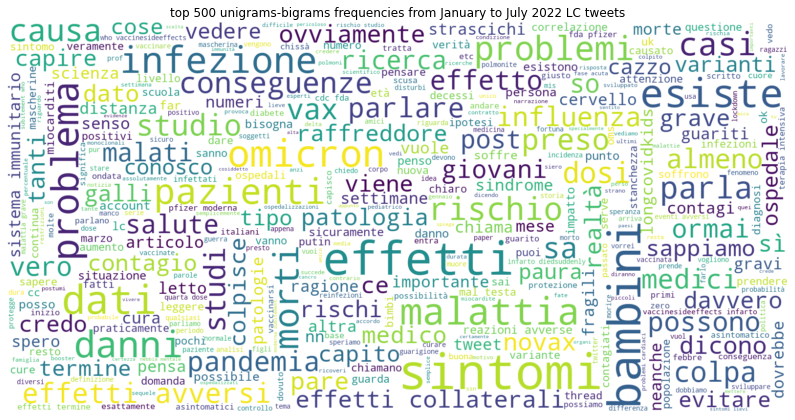

In [30]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
% matplotlib inline

#wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(
    background_color = 'white', 
    width = 1600, height = 800,
    max_font_size = 100,
    min_font_size = 10, 
    random_state = 0,
    stopwords = it_stop,
    scale = 1,
    max_words = 500,
    collocations = True   #Whether to include collocations (bigrams) of two words. 
).generate(text)

plt.figure(figsize=[14,18])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('top 500 unigrams-bigrams frequencies from January to July 2022 LC tweets')

In [31]:
wordcloud.to_file('twint_scraped2022.png')

In [32]:
wordcloud.words_

{'accordo': 0.07779349363507779,
 'account': 0.1371994342291372,
 'addirittura': 0.06223479490806223,
 'adulti': 0.05799151343705799,
 'almeno': 0.28005657708628007,
 'alta': 0.06789250353606789,
 'altra': 0.15983026874115983,
 'amici': 0.0876944837340877,
 'amico': 0.06789250353606789,
 'analisi': 0.09052333804809053,
 'andare': 0.10183875530410184,
 'ansia': 0.0594059405940594,
 'anzi': 0.07637906647807638,
 'anziani': 0.06082036775106082,
 'appena': 0.09193776520509193,
 'appunto': 0.06647807637906648,
 'argomento': 0.06506364922206506,
 'arriva': 0.08628005657708628,
 'articolo': 0.16265912305516267,
 'asintomatici': 0.09759547383309759,
 'asintomatico': 0.10466760961810467,
 'assolutamente': 0.07637906647807638,
 'attenzione': 0.11456859971711457,
 'auguro': 0.06364922206506365,
 'aumento': 0.10891089108910891,
 'bambini': 0.8288543140028288,
 'bambini adolescenti': 0.06364922206506365,
 'base': 0.10325318246110325,
 'beh': 0.06506364922206506,
 'bel': 0.06223479490806223,
 'bella

In [33]:
import json
with open('tokens_freq_2022.json', 'w') as fp:
    json.dump(wordcloud.words_, fp)

In [69]:
#(wordcloud.words_).items()
#v= {k: v for v, k in sorted(wordcloud.words_.items(), key=lambda x: x[1])}

#ord=[]
#for key in sorted(v, reverse=True):
 #   ord.append(("%s: %s" % (key, v[key])))

In [ ]:
#print(ord)
#print(len(ord))

In [34]:
print(len(wordcloud.words_))
wordcloud.words_['miocarditi']

500


0.1371994342291372